# Puntuaciones de examenes de estuadiantes

En el presente proyecto abordaremos un conjunto de datos sobre los tres tipos de puntuaciones (Matematica, Lectura y Escritura)  que obtuvieron los alumnos de un colegio publico, en este conjunto de datos tambien se encuentran factores externos que pueden o no influir en el resultado de las calificaciones. Esto lo estudiaremos a lo largo de este cuaderno haciendo uso de las diversas librerias utilizadas para el analisis de datos (Numpy, Pandas, Matplotlip y Seaborn).

El conjunto de datos se obtuvo de Kaggle: https://www.kaggle.com/datasets/desalegngeb/students-exam-scores

**Descripción de cada columna del conjunto de datos**

- Género : Género del estudiante (masculino/femenino)
- EthnicGroup : Grupo étnico del estudiante (grupo A a E)
- ParentEduc : antecedentes educativos de los padres (desde alguna escuela secundaria hasta una maestría)
- LunchType : Tipo de almuerzo escolar (estándar o gratis/reducido)
- TestPrep : curso de preparación para exámenes seguido (completado o ninguno)
- ParentMaritalStatus : estado civil de los padres (casado/soltero/viudo/divorciado)
- PracticeSport : Frecuencia con la que el alumno practica deporte (nunca/a veces/regularmente)
- IsFirstChild : si el niño es el primer niño de la familia o no (sí/no)
- NrSiblings : Número de hermanos que tiene el estudiante (0 a 7)
- TransportMeans : Medio de transporte a la escuela (autobús escolar/privado)
- WklyStudyHours : Horas semanales de autoaprendizaje (menos de 5 horas; entre 5 y 10 horas; más de 10 horas)
- MathScore : puntaje de la prueba de matemáticas (0-100)
- ReadingScore : puntuación de la prueba de lectura (0-100)
- WritingScore : puntaje de la prueba de escritura (0-100)

## Descarga del conjunto de datos

En esta sección descargaremos el conjunto de datos.

In [1]:
dataset_url = 'https://www.kaggle.com/datasets/desalegngeb/students-exam-scores' 

In [2]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jeanedinson
Your Kaggle Key: ········


100%|██████████| 695k/695k [00:00<00:00, 1.06MB/s]

El conjunto de datos se ha descargado y extraído.

In [3]:
data_dir = './students-exam-scores'

In [4]:
import os
os.listdir(data_dir)

['Expanded_data_with_more_features.csv', 'Original_data_with_more_rows.csv']

## Preparación y limpieza de datos

Esta es la etapa mas importante ya que prepararemos los datos con la finalidad de que estos esten aptos para generar conocimiento.

Se indentificara que dimensiones poseen datos nulos, si existen valores atipicos y como trabajarlos, si es necesario crear otras columnas o dejar de lado algunas.



In [5]:
import pandas as pd

Procederemos a leer el archivo CSV

In [7]:
calificaciones_df = pd.read_csv("./students-exam-scores/Expanded_data_with_more_features.csv")
calificaciones_df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


Hecharemos un vistazo a la estructura de los datos

In [8]:
calificaciones_df.shape

(30641, 15)

In [9]:
calificaciones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


En este caso, se ha visto conveniente no tener en cuenta la columna de ID que viene por defecto en el conjunto de datos, ya que contamos con la indexación de pandas.

Tambien se ha dejado de lado la columna "IsFirstChild" ya que se presume que el hecho de que un alumno sea el primer hijo no supune un factor influyente en sus calificaciones, lo mismo sucede con el hecho de que viaje en bus escolar o transporte privado (TransportMeans).

In [10]:
calificaciones_df.drop(columns=["Unnamed: 0","IsFirstChild","TransportMeans"], inplace=True)

In [11]:
calificaciones_df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,3.0,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,0.0,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,4.0,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,1.0,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,0.0,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,2.0,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,1.0,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,1.0,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,3.0,5 - 10,82,90,93


In [12]:
calificaciones_df.shape

(30641, 12)

Vamos a verificar si los tipos de datos de las columnas estan acorde a los datos y si hay valores nulos.

Podemos ver que la colunmna "NrSiblings" que representa al numero de hermanos es de tipo float, cosa que no tiene mucho sentido ya que no podemos tener 2.3 hermanos, procederemos a cambiarle el tipo de dato.

Pero antes de cambiar los tipos de datos, tenemos que dar solucion a los datos nulos, existen 7 columnas con datos nulos

In [13]:
calificaciones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   NrSiblings           29069 non-null  float64
 8   WklyStudyHours       29686 non-null  object 
 9   MathScore            30641 non-null  int64  
 10  ReadingScore         30641 non-null  int64  
 11  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 2.8+ MB


Al existir 7 columnas con valores nulos, se tomo la desición de eliminar los registros con 3 o mas valores nulos. En este caso existen 102 registros con 3 o mas valores nulos

In [14]:
registros_tres_nulos = calificaciones_df[calificaciones_df.isnull().sum(axis=1)>=3]
registros_tres_nulos

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
70,male,group A,NaN,standard,completed,NaN,regularly,NaN,5 - 10,82,79,83
562,female,NaN,NaN,standard,NaN,married,sometimes,3.0,5 - 10,74,76,73
697,male,NaN,NaN,standard,none,divorced,sometimes,NaN,5 - 10,55,47,44
742,female,NaN,NaN,standard,completed,married,sometimes,NaN,> 10,74,80,83
1273,male,group D,high school,standard,NaN,married,NaN,NaN,5 - 10,63,52,48
...,...,...,...,...,...,...,...,...,...,...,...,...
27884,female,group C,NaN,free/reduced,NaN,NaN,never,2.0,5 - 10,47,55,54
27889,female,NaN,high school,standard,NaN,married,sometimes,NaN,> 10,71,80,74
27915,male,NaN,associate's degree,standard,NaN,married,regularly,NaN,5 - 10,99,92,87
28221,male,NaN,associate's degree,standard,none,divorced,regularly,NaN,NaN,85,82,88


In [15]:
calificaciones_df.drop(registros_tres_nulos.index, inplace=True)
calificaciones_df.shape

(30539, 12)

In [16]:
calificaciones_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30539 entries, 0 to 30640
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30539 non-null  object 
 1   EthnicGroup          28754 non-null  object 
 2   ParentEduc           28752 non-null  object 
 3   LunchType            30539 non-null  object 
 4   TestPrep             28758 non-null  object 
 5   ParentMaritalStatus  29390 non-null  object 
 6   PracticeSport        29934 non-null  object 
 7   NrSiblings           29012 non-null  float64
 8   WklyStudyHours       29622 non-null  object 
 9   MathScore            30539 non-null  int64  
 10  ReadingScore         30539 non-null  int64  
 11  WritingScore         30539 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 3.0+ MB


Cerca del %5.8 de los registros poseen valores nulos en la columna "EthnicGroup".

Teniendo en cuenta que es un porcentaje considerable de datos, no se eliminaron los registros y se opto por remplazar los valores nulos por el valor "Desconocido" ya que la moda no supera el 50% de los datos.

In [17]:
calificaciones_df.EthnicGroup.value_counts(dropna=False, normalize=True) * 100

group C    30.122139
group D    24.516192
group B    19.044500
group E    13.219162
group A     7.253021
NaN         5.844985
Name: EthnicGroup, dtype: float64

Valores nulos remplazados en la columna "EthnicGroup"

In [18]:
registros_nulos = calificaciones_df.EthnicGroup.isnull()
calificaciones_df.loc[registros_nulos==True, "EthnicGroup"] = "Desconocido"

In [19]:
calificaciones_df.EthnicGroup.value_counts(dropna=False, normalize=True) * 100

group C        30.122139
group D        24.516192
group B        19.044500
group E        13.219162
group A         7.253021
Desconocido     5.844985
Name: EthnicGroup, dtype: float64

Cerca del %5.8 de los registros poseen valores nulos en la columna "ParentEduc".

Teniendo en cuenta que es un porcentaje considerable de datos, no se eliminaron los registros y se opto por remplazar los valores nulos por el valor "Desconocido" ya que la moda no supera el 50% de los datos.

In [20]:
calificaciones_df.ParentEduc.value_counts(dropna=False, normalize=True) * 100

some college          21.687023
high school           18.599168
associate's degree    18.153836
some high school      18.016307
bachelor's degree     11.071089
master's degree        6.621042
NaN                    5.851534
Name: ParentEduc, dtype: float64

Valores nulos remplazados en la columna "ParentEduc".

In [21]:
registros_nulos = calificaciones_df.ParentEduc.isnull()
calificaciones_df.loc[registros_nulos==True, "ParentEduc"] = "Desconocido"

In [22]:
calificaciones_df.ParentEduc.value_counts(dropna=False, normalize=True) * 100

some college          21.687023
high school           18.599168
associate's degree    18.153836
some high school      18.016307
bachelor's degree     11.071089
master's degree        6.621042
Desconocido            5.851534
Name: ParentEduc, dtype: float64

Cerca del %5.8 de los registros poseen valores nulos en la columna "TestPrep".

Esta columna difiere de las dos anteriores, ya que el contexto es diferente.

En primer lugar, existe un valor "none" con una incidencia del 61.7% en los datos y que hace referencia a una negativa en la culminacion de un curso de preparación

Ya se ha visto en otros proyectos que el valor nulo en la mayoria de los casos hace referencia a la negativa de lo que representa la columna
    
Es por esto que se opto por remplazar los valores nulos de esta columna por el valor "none"

In [23]:
calificaciones_df.TestPrep.value_counts(dropna=False, normalize=True) * 100

none         61.629392
completed    32.538721
NaN           5.831887
Name: TestPrep, dtype: float64

Valores nulos remplazados en la columna "TestPrep".

In [24]:
registros_nulos = calificaciones_df.TestPrep.isnull()
calificaciones_df.loc[registros_nulos==True, "TestPrep"] = "none"

In [25]:
calificaciones_df.TestPrep.value_counts(dropna=False, normalize=True) * 100

none         67.461279
completed    32.538721
Name: TestPrep, dtype: float64

Contexto:
    
El total de valores nulos de la columna "ParentMaritalStatus" abarcan un 3.8% de los registros, menos del 5%.

La moda, que en este caso es el valor "married", supera el 50% de los registros.
    
Por esto se opto por remplazar los valores nulos por la moda.

In [26]:
calificaciones_df.ParentMaritalStatus.value_counts(dropna=False, normalize=True) * 100

married     55.041095
single      23.193294
divorced    16.067979
NaN          3.762402
widowed      1.935230
Name: ParentMaritalStatus, dtype: float64

Valores nulos remplazados en la columna "ParentMaritalStatus".

In [27]:
registros_nulos = calificaciones_df.ParentMaritalStatus.isnull()
calificaciones_df.loc[registros_nulos==True, "ParentMaritalStatus"] = "married"

In [28]:
calificaciones_df.ParentMaritalStatus.value_counts(dropna=False, normalize=True) * 100

married     58.803497
single      23.193294
divorced    16.067979
widowed      1.935230
Name: ParentMaritalStatus, dtype: float64

Contexto:

El total de valores nulos de la columna "PracticeSport" abarcan un 1.9% de los registros, menos del 5%.

La moda, que en este caso es el valor "sometimes", posee una incidencia del 49.7% de la totalidad de los registros.

Por esto se opto por remplazar los valores nulos por la moda.

In [29]:
calificaciones_df.PracticeSport.value_counts(dropna=False, normalize=True) * 100

sometimes    49.677462
regularly    35.259832
never        13.081633
NaN           1.981073
Name: PracticeSport, dtype: float64

Valores nulos remplazados en la columna "PracticeSport".

In [30]:
registros_nulos = calificaciones_df.PracticeSport.isnull()
calificaciones_df.loc[registros_nulos==True, "PracticeSport"] = "sometimes"

In [31]:
calificaciones_df.PracticeSport.value_counts(dropna=False, normalize=True) * 100

sometimes    51.658535
regularly    35.259832
never        13.081633
Name: PracticeSport, dtype: float64

Cerca del %4.9 de los registros poseen valores nulos en la columna "NrSiblings".

Esta columna posee un contexto similar a la vista en la columna "TestPrep", ya que el contexto es diferente.

En primer lugar, existe un valor "0.0" con una incidencia del 10.1% en los datos y que hace referencia a que un alumno no tiene hermanos.

Ya se ha visto en otros proyectos que el valor nulo en la mayoria de los casos hace referencia a la negativa de lo que representa la columna.

Es por esto que se opto por remplazar los valores nulos de esta columna por el valor "0.0".

In [32]:
calificaciones_df.NrSiblings.value_counts(dropna=False, normalize=True) * 100

1.0    26.850912
2.0    22.188022
3.0    20.010478
0.0    10.078915
4.0     9.613936
NaN     5.000164
5.0     4.315793
6.0     0.988899
7.0     0.952880
Name: NrSiblings, dtype: float64

Valores nulos remplazados en la columna "NrSiblings".

In [33]:
registros_nulos = calificaciones_df.NrSiblings.isnull()
calificaciones_df.loc[registros_nulos==True, "NrSiblings"] = 0.0

In [34]:
calificaciones_df.NrSiblings.value_counts(dropna=False, normalize=True) * 100

1.0    26.850912
2.0    22.188022
3.0    20.010478
0.0    15.079079
4.0     9.613936
5.0     4.315793
6.0     0.988899
7.0     0.952880
Name: NrSiblings, dtype: float64

Contexto:

El total de valores nulos de la columna "WklyStudyHours" abarcan un 2.9% de los registros, menos del 5%.

La moda, que en este caso es el valor "5 - 10", posee una incidencia del 53.1% de la totalidad de los registros.

Por esto se opto por remplazar los valores nulos por la moda.

In [35]:
calificaciones_df.WklyStudyHours.value_counts(dropna=False, normalize=True) * 100

5 - 10    53.079669
< 5       26.926225
> 10      16.991388
NaN        3.002718
Name: WklyStudyHours, dtype: float64

Valores nulos remplazados en la columna "WklyStudyHours".

In [36]:
registros_nulos = calificaciones_df.WklyStudyHours.isnull()
calificaciones_df.loc[registros_nulos == True, "WklyStudyHours"] = "5 - 10"

In [37]:
calificaciones_df.WklyStudyHours.value_counts(dropna=False, normalize=True) * 100

5 - 10    56.082386
< 5       26.926225
> 10      16.991388
Name: WklyStudyHours, dtype: float64

In [38]:
calificaciones_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30539 entries, 0 to 30640
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30539 non-null  object 
 1   EthnicGroup          30539 non-null  object 
 2   ParentEduc           30539 non-null  object 
 3   LunchType            30539 non-null  object 
 4   TestPrep             30539 non-null  object 
 5   ParentMaritalStatus  30539 non-null  object 
 6   PracticeSport        30539 non-null  object 
 7   NrSiblings           30539 non-null  float64
 8   WklyStudyHours       30539 non-null  object 
 9   MathScore            30539 non-null  int64  
 10  ReadingScore         30539 non-null  int64  
 11  WritingScore         30539 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 3.0+ MB


Ya habiendo trabajado todos los valores nulos, procederemos a cambiar el tipo de dato de la columna "NrSiblings".

In [39]:
calificaciones_df.NrSiblings = calificaciones_df.NrSiblings.astype(int)
calificaciones_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30539 entries, 0 to 30640
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               30539 non-null  object
 1   EthnicGroup          30539 non-null  object
 2   ParentEduc           30539 non-null  object
 3   LunchType            30539 non-null  object
 4   TestPrep             30539 non-null  object
 5   ParentMaritalStatus  30539 non-null  object
 6   PracticeSport        30539 non-null  object
 7   NrSiblings           30539 non-null  int32 
 8   WklyStudyHours       30539 non-null  object
 9   MathScore            30539 non-null  int64 
 10  ReadingScore         30539 non-null  int64 
 11  WritingScore         30539 non-null  int64 
dtypes: int32(1), int64(3), object(8)
memory usage: 2.9+ MB


In [40]:
calificaciones_df.sample(10)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
20315,female,group D,some college,standard,none,married,regularly,2,> 10,61,65,70
15560,male,group B,bachelor's degree,standard,none,married,sometimes,3,5 - 10,75,68,67
29303,female,group C,Desconocido,free/reduced,completed,divorced,sometimes,1,< 5,67,76,78
6628,male,group C,high school,standard,none,married,sometimes,5,5 - 10,56,50,41
18273,female,group D,bachelor's degree,standard,none,married,sometimes,3,5 - 10,77,87,94
22711,male,group E,some high school,standard,completed,married,sometimes,1,5 - 10,64,75,66
2531,female,group E,high school,free/reduced,none,married,never,2,> 10,59,68,69
10346,female,group A,bachelor's degree,free/reduced,none,single,regularly,1,5 - 10,59,61,55
10399,male,group B,high school,standard,none,married,sometimes,1,< 5,50,51,43
16121,female,group C,some college,free/reduced,none,single,sometimes,2,5 - 10,57,57,64


Como ultimo paso de la etapa de preparación y limpieza de datos, se considero necesario agregar una nueva columna con la calificación promedio de cada alumno

In [41]:
calificaciones_df["MeanScore"] = round((calificaciones_df.MathScore + calificaciones_df.ReadingScore + calificaciones_df.WritingScore)/3, 2)

In [42]:
calificaciones_df.sample(10)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,MeanScore
14745,male,group B,associate's degree,standard,none,single,sometimes,2,5 - 10,81,77,72,76.67
25421,female,group C,high school,free/reduced,none,single,regularly,4,< 5,52,72,68,64.00
20349,female,group C,high school,free/reduced,completed,married,sometimes,2,> 10,35,48,52,45.00
26644,male,group E,some high school,standard,none,married,never,3,> 10,78,81,68,75.67
20087,male,group D,high school,standard,none,married,sometimes,5,5 - 10,60,48,44,50.67
9112,male,group B,associate's degree,free/reduced,none,married,sometimes,1,< 5,67,59,54,60.00
16983,male,group D,Desconocido,standard,completed,single,regularly,1,5 - 10,87,85,88,86.67
8132,female,Desconocido,associate's degree,standard,completed,married,regularly,0,< 5,76,82,89,82.33
22857,male,group B,high school,free/reduced,completed,divorced,regularly,2,< 5,43,46,40,43.00
19167,male,group A,bachelor's degree,free/reduced,completed,married,regularly,4,5 - 10,38,46,39,41.00


In [43]:
calificaciones_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30539 entries, 0 to 30640
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30539 non-null  object 
 1   EthnicGroup          30539 non-null  object 
 2   ParentEduc           30539 non-null  object 
 3   LunchType            30539 non-null  object 
 4   TestPrep             30539 non-null  object 
 5   ParentMaritalStatus  30539 non-null  object 
 6   PracticeSport        30539 non-null  object 
 7   NrSiblings           30539 non-null  int32  
 8   WklyStudyHours       30539 non-null  object 
 9   MathScore            30539 non-null  int64  
 10  ReadingScore         30539 non-null  int64  
 11  WritingScore         30539 non-null  int64  
 12  MeanScore            30539 non-null  float64
dtypes: float64(1), int32(1), int64(3), object(8)
memory usage: 3.1+ MB


Una de las formas de determinar si existen valores atipicos es estudiando la diferencia entre la media y la mediana, si esta es significativa pueden haber valores atipicos, en ese caso se tendria que estudiar la distribución estandar.

Sin embargo, en este caso podemos ver que las columnas numericas poseen una diferencia muy pequeña entre la media y la mediana por lo que no sera necesario trabajar valores atipicos.

In [44]:
calificaciones_df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore,MeanScore
count,30539.000000,30539.000000,30539.000000,30539.000000,30539.000000
mean,2.038967,66.559350,69.382167,68.425096,68.122191
std,1.496581,15.363064,14.760001,15.445307,14.456045
min,0.000000,0.000000,10.000000,4.000000,9.000000
25%,1.000000,56.000000,59.000000,58.000000,58.330000
50%,2.000000,67.000000,70.000000,69.000000,68.330000
75%,3.000000,78.000000,80.000000,79.000000,78.670000
max,7.000000,100.000000,100.000000,100.000000,100.000000


## Análisis Exploratorio y Visualización

Ya teniendo los datos preparados y limpios, procederemos a explorarlos para obtener conocimiento y representarlo mediante graficos.



Empecemos por importar `matplotlib.pyplot` y `seaborn`.

In [45]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (18, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Exploramos algunos datos estadisticos de las dimensiones númericas.

In [46]:
calificaciones_df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore,MeanScore
count,30539.000000,30539.000000,30539.000000,30539.000000,30539.000000
mean,2.038967,66.559350,69.382167,68.425096,68.122191
std,1.496581,15.363064,14.760001,15.445307,14.456045
min,0.000000,0.000000,10.000000,4.000000,9.000000
25%,1.000000,56.000000,59.000000,58.000000,58.330000
50%,2.000000,67.000000,70.000000,69.000000,68.330000
75%,3.000000,78.000000,80.000000,79.000000,78.670000
max,7.000000,100.000000,100.000000,100.000000,100.000000


In [47]:
calificaciones_df.sample(10)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,MeanScore
28917,male,group D,some college,standard,none,divorced,regularly,1,< 5,81,71,73,75.00
30270,female,group C,Desconocido,free/reduced,none,married,sometimes,5,< 5,25,38,38,33.67
716,male,group C,master's degree,free/reduced,completed,single,never,1,5 - 10,77,77,75,76.33
26712,male,group E,master's degree,standard,none,single,sometimes,2,< 5,79,79,75,77.67
13194,female,group A,Desconocido,standard,completed,married,sometimes,1,> 10,66,72,73,70.33
7172,male,group C,associate's degree,free/reduced,none,single,never,0,> 10,52,55,48,51.67
3764,male,group D,some high school,free/reduced,completed,married,sometimes,1,5 - 10,64,73,66,67.67
24084,female,group B,master's degree,free/reduced,none,divorced,sometimes,5,5 - 10,38,56,53,49.00
14384,female,group B,associate's degree,standard,none,married,sometimes,2,< 5,64,66,68,66.00
24166,male,group E,some college,free/reduced,completed,married,sometimes,2,< 5,87,86,80,84.33


**Comparación de los tres tipos de calificaciones por genero**

En esta sección exploraremos la dispersión de los datos entre las calificaciones de matematicas, escritura y lectura clasificandolas por genero para obervar el desempeño estudiantel en las areas por genero.

In [48]:
muestra_tamaño = int(calificaciones_df.shape[0] * 0.2)
muestra_datos = calificaciones_df.sample(muestra_tamaño)
muestra_datos

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,MeanScore
2467,female,group A,some high school,standard,completed,married,regularly,3,> 10,60,74,79,71.00
3135,female,group E,some college,standard,none,married,sometimes,2,< 5,76,79,76,77.00
28253,male,group C,some high school,free/reduced,none,married,regularly,2,5 - 10,45,37,35,39.00
25350,male,group D,some college,standard,completed,married,regularly,1,5 - 10,66,61,67,64.67
4773,male,group E,associate's degree,free/reduced,none,married,regularly,2,5 - 10,82,73,75,76.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10680,female,group E,some high school,standard,completed,divorced,regularly,4,5 - 10,41,50,55,48.67
11780,male,group D,bachelor's degree,free/reduced,none,married,regularly,3,5 - 10,76,74,68,72.67
14098,male,group D,high school,standard,none,divorced,sometimes,2,5 - 10,90,84,76,83.33
14456,female,group C,high school,free/reduced,none,single,sometimes,2,5 - 10,59,71,68,66.00


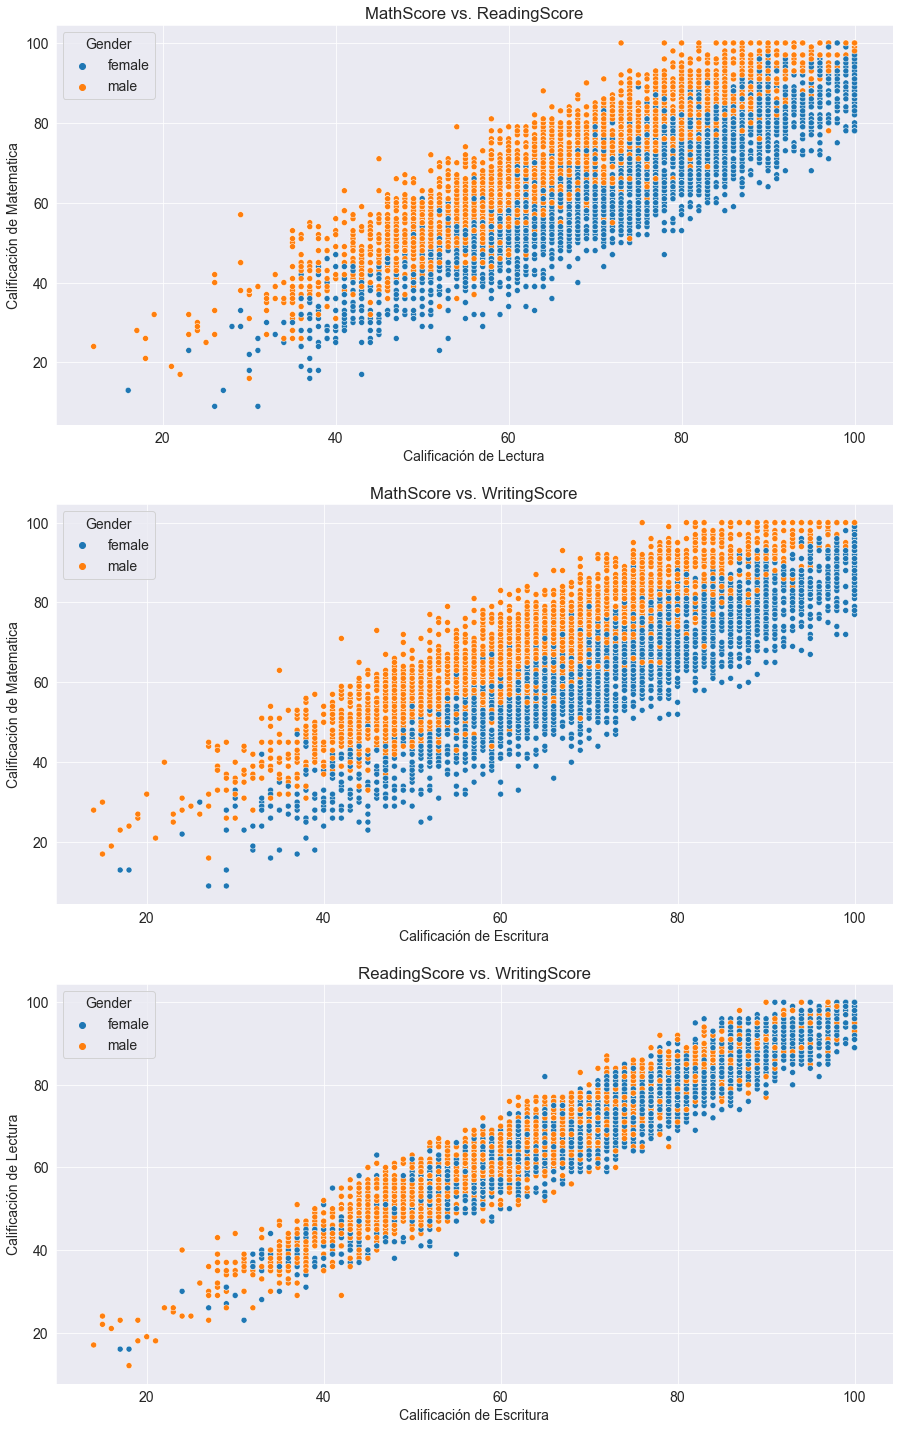

In [49]:
fig, axes = plt.subplots(3, 1, figsize=(15, 25))

axes[0,].set_title("MathScore vs. ReadingScore")
sns.scatterplot(y = "MathScore", x = "ReadingScore", data=muestra_datos, hue="Gender", ax=axes[0,])
axes[0,].set_xlabel("Calificación de Lectura")
axes[0,].set_ylabel("Calificación de Matematica");

axes[1,].set_title("MathScore vs. WritingScore")
sns.scatterplot(y = "MathScore", x = "WritingScore", data=muestra_datos, hue="Gender", ax=axes[1,])
axes[1,].set_xlabel("Calificación de Escritura")
axes[1,].set_ylabel("Calificación de Matematica");

axes[2,].set_title("ReadingScore vs. WritingScore")
sns.scatterplot(y = "ReadingScore", x = "WritingScore", data=muestra_datos, hue="Gender", ax=axes[2,])
axes[2,].set_xlabel("Calificación de Escritura")
axes[2,].set_ylabel("Calificación de Lectura");

Mediante los graficos de dispersión se pudo concluir lo siguinte:

- Los hombres tienen un desempeño significativo en el area de Matematicas a comparación de las mujeres.
- Las mujeres poseen una mejor escritura y lectura que los hombres, sin embargo, esta diferencia no es tan grande.

**Prodominancia de calificaciones**

En esta sección explraremos los resultados de los alumnos en las tres areas calificadas.

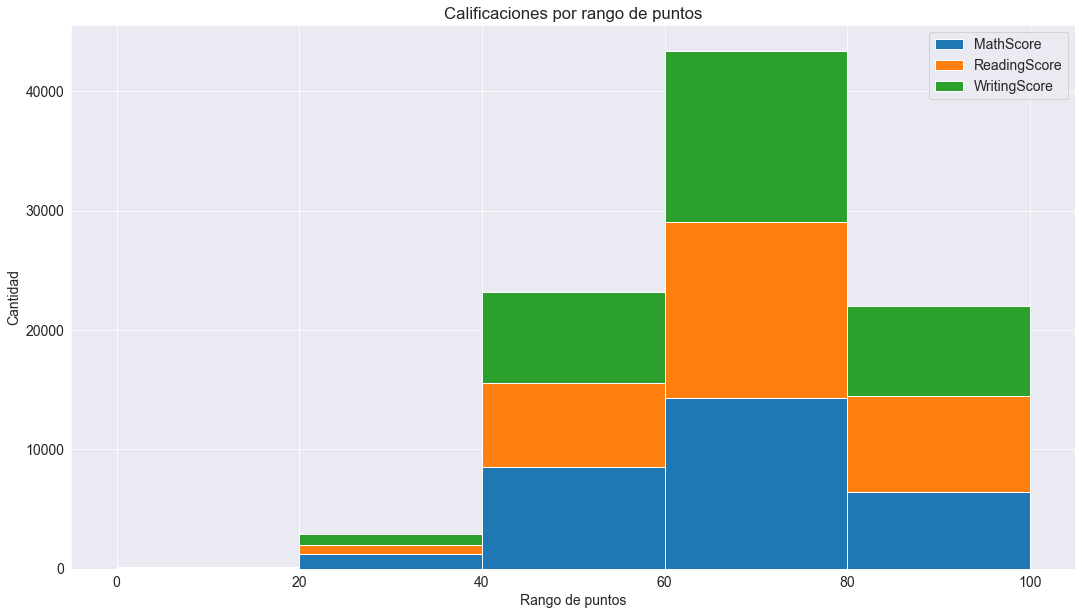

In [50]:
plt.hist([calificaciones_df.MathScore, calificaciones_df.ReadingScore, calificaciones_df.WritingScore], bins=5, stacked=True)
plt.legend(["MathScore", "ReadingScore", "WritingScore"])
plt.title("Calificaciones por rango de puntos")
plt.xlabel("Rango de puntos")
plt.ylabel("Cantidad");

Mediante el histograma se pudo concluir lo siguiente:

- Predominan las calificaciones entre 60 y 80 puntos en las tres areas, estando en segundo lugar las calificaciones entre 40 y 60 puntos.
- Las calificaciones entre 0 y 20 puntos son los que menos se han registrado, siguiendola las calificaciones entre 20 y 40 puntos.

**Calificacion pronmedio por número de hermanos** 

En esta sección exploraremos la dispersión de las calificaciones promedio por el número de hermanos que tienen los alumnos.

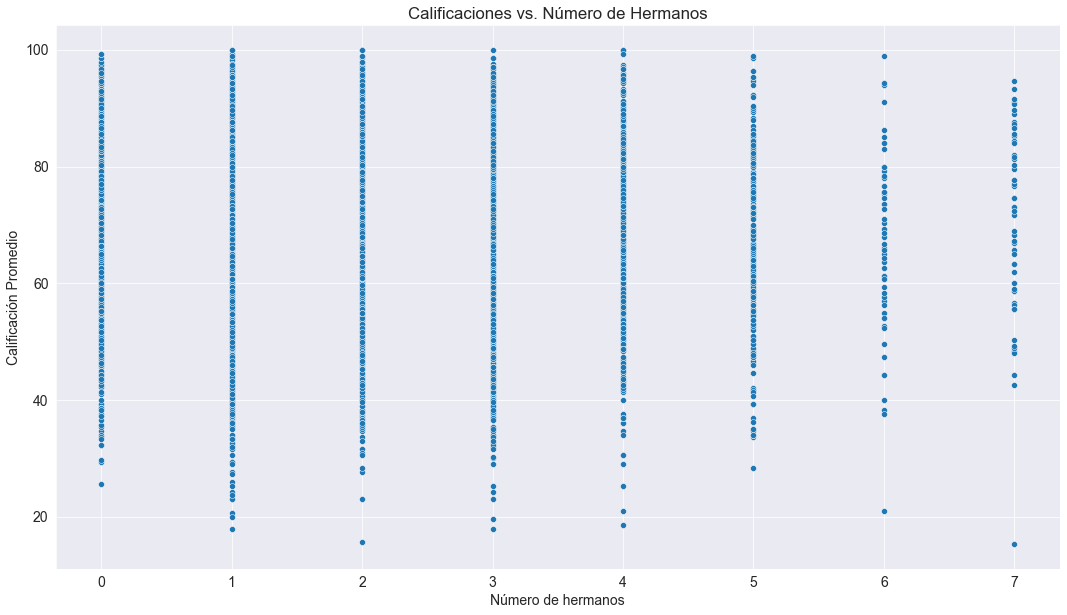

In [51]:
plt.title("Calificaciones vs. Número de Hermanos")
sns.scatterplot(x = "NrSiblings", y = "MeanScore", data=muestra_datos)
plt.xlabel("Número de hermanos")
plt.ylabel("Calificación Promedio");

Mediante el grafico de dispersión se pudo concluir lo siguinte:

- En un inicio se pensó que los alumnos con mayor número de hermanos eran los que obtenian las peores calificaciones ya que no tenian la total atención de los padres, sin embargo, esto no es asi ya que podemos ver en el grafico que la mayoria de alumnos con 7 y 6 hermanos han obtenido calificaciones mayor a  40 puntos. Mientras que un porcentaje considerable de los alumnos con 1 y 3 hermanos han obtenido las calificaciones mas bajas.
- En contraparte a la aseveración anterior, tambien se puede concluir que a los alumnos con 6 y 7 hermanos les cuesta obtener calificaciones entre los 95 y 100 puntos.

**Calificaciones por horas estudiadas**

En esta sección estudiaremos la influencia de las horas estudiadas por los alumnos en sus calificaciones.

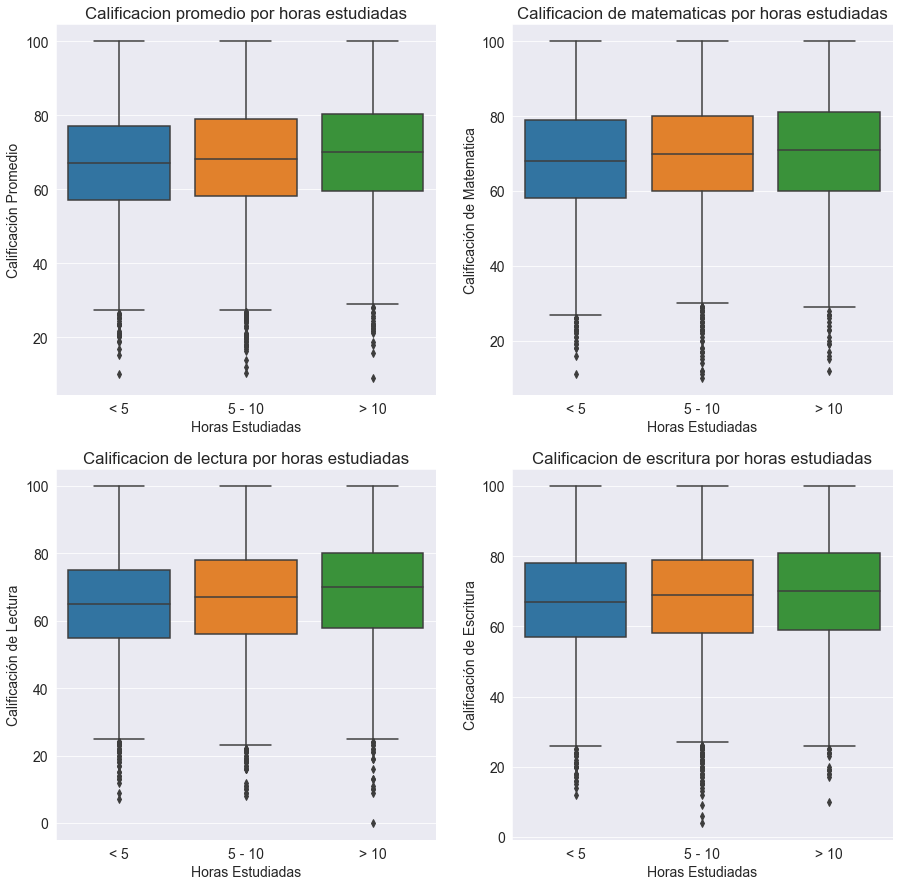

In [52]:
fig, axes = plt.subplots(2,2, figsize=(15, 15))

axes[0,0].set_title("Calificacion promedio por horas estudiadas")
sns.boxplot(x="WklyStudyHours", y="MeanScore", data=calificaciones_df, ax=axes[0,0])
axes[0,0].set_xlabel("Horas Estudiadas")
axes[0,0].set_ylabel("Calificación Promedio");

axes[1,0].set_title("Calificacion de lectura por horas estudiadas")
sns.boxplot(x="WklyStudyHours", y="MathScore", data=calificaciones_df, ax=axes[1,0])
axes[1,0].set_xlabel("Horas Estudiadas")
axes[1,0].set_ylabel("Calificación de Lectura");

axes[0,1].set_title("Calificacion de matematicas por horas estudiadas")
sns.boxplot(x="WklyStudyHours", y="ReadingScore", data=calificaciones_df, ax=axes[0,1])
axes[0,1].set_xlabel("Horas Estudiadas")
axes[0,1].set_ylabel("Calificación de Matematica");

axes[1,1].set_title("Calificacion de escritura por horas estudiadas")
sns.boxplot(x="WklyStudyHours", y="WritingScore", data=calificaciones_df, ax=axes[1,1])
axes[1,1].set_xlabel("Horas Estudiadas")
axes[1,1].set_ylabel("Calificación de Escritura");


Mediante los graficos de cajas y bigotes se pudo concluir lo siguiente:

- Si existe una correlación entre las horas estudiadas y las calificaciones obtenidas, sin embargo esta es minima, ya que la diferencia entre los alumnos que estudiaron menos de 5 horas y los que estudiaron mas de 10 horas esta en un rango de 5 a 8 puntos maximo.

- Estudiar menos de 5 horas, entre 5 y 10 horas o mas de 10 horas te asegura en un gran porcentaje obtener como minimo una calificacion entre 20 y 40 puntos.

**Calificaciones promedio por nivel de estudio de padres**

En esta sección estudiaremos si el nivel de educación de lo padres afecta en las calificaciones de sus hijos. En primera instancia si deberia afectar ya que los padres tendrian mas conocimientos solidos que impartirlea a sus hijos si es que han alcanzado un nivel considerable de educación.

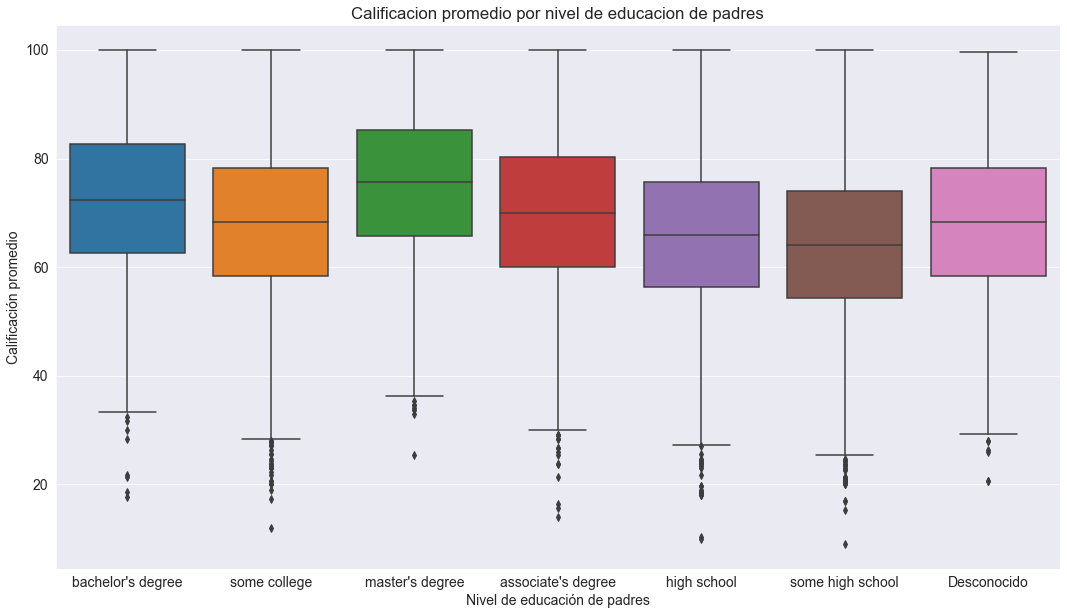

In [53]:
plt.title("Calificacion promedio por nivel de educacion de padres")
sns.boxplot(x="ParentEduc", y="MeanScore", data=calificaciones_df)
plt.xlabel("Nivel de educación de padres")
plt.ylabel("Calificación promedio");

Observando el grafico de caja y bigote podemos concluir lo siguiente:

- El nivel de educación de los padres tiene una correlación marcada con las calificaciones de sus hijos, ya que los padres de los alumnos que obtienen las mas altas notas poseen una maestria, el puntaje minimo de estos alumnos es de 37 segun el grafico. Mientras que los padres de los alumnos que obtienen las notas mas bajas solo han llegado a estudiar en algun instituto pero no lo han culminado, el puntaje minimo de estos alumnos es de 27.

- El orden de relevancia del nivel de educacion de los padres, ordenados desde aquellos alumnos que han obtenido mejores notas hasta los que han obtenido las notas mas bajas seria de la siguiente manera:

1. master's degree.
2. bachelor's degree.
3. associate's degree.
4. some college.
5. high school.
6. some high school.

- Cabe resaltar que sin importar el nivel de educacion de los padres, el puntaje maximo de los alumnos ha sido de 100 puntos.

## Hacer y responder preguntas

Como en todo proyecto de analisis de datos, surgen preguntas estrategicas que necesitan de repuesta. Eso es lo que haremos en la siguiente sección.


#### Q1: ¿Que nivel de educacion predomina en los alumnos con puntaje perfecto en matematicas, lectura y escritura (100 puntos)?

Para responder esta pregunta, lo primero que vamos a hacer es obtener los registros donde los alumnos han obtenido un puntaje perfecto en las tres areas calificadas.

In [54]:
alumnos_excelentes = calificaciones_df[(calificaciones_df.MathScore==100.0) & (calificaciones_df.ReadingScore==100.0) & (calificaciones_df.WritingScore==100.0)]
alumnos_excelentes

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,MeanScore
432,female,group E,bachelor's degree,standard,none,married,regularly,2,5 - 10,100,100,100,100.0
868,male,group E,bachelor's degree,standard,completed,single,regularly,7,5 - 10,100,100,100,100.0
912,female,group E,associate's degree,standard,none,single,regularly,3,5 - 10,100,100,100,100.0
981,female,group E,high school,standard,completed,divorced,regularly,1,5 - 10,100,100,100,100.0
989,female,group E,bachelor's degree,standard,completed,married,sometimes,0,5 - 10,100,100,100,100.0
1305,female,group E,high school,standard,completed,divorced,sometimes,0,5 - 10,100,100,100,100.0
1980,male,group C,associate's degree,standard,completed,married,regularly,3,> 10,100,100,100,100.0
2325,male,group E,some college,standard,completed,divorced,regularly,3,5 - 10,100,100,100,100.0
2484,female,group A,some college,standard,completed,divorced,regularly,3,> 10,100,100,100,100.0
2651,female,group D,master's degree,standard,none,married,sometimes,3,5 - 10,100,100,100,100.0


Luego contaremos la cantidad de registros por nivel de educación de los padres.

In [55]:
alumnos_excelentes.value_counts("ParentEduc")

ParentEduc
bachelor's degree     14
master's degree       13
associate's degree    11
some college           5
high school            3
some high school       1
dtype: int64

Como respuesta a la pregunta, tenemos que hay 47 alumnos con puntaje perfecto. De los cuales, 14 tienen padres con licenciatura, 13 con maestria, 11 con titulo de asociado, 5 con alguna educacion superior, 3 con escuela secundaria y 1 con algun instituto.

#### Q2: ¿Que nivel de educacion predomina en los 30 alumnos con peor puntaje en matematicas, lectura y escritura?

Para responder esta pregunta, lo primero que vamos a hacer es obtener los 30 registros donde los alumnos han obtenido las notas mas bajas.

In [56]:
peores_alumnos = calificaciones_df.sort_values("MeanScore").head(30)
peores_alumnos

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,MeanScore
55,female,group C,some high school,free/reduced,none,single,regularly,3,> 10,0,17,10,9.00
14494,male,group D,high school,free/reduced,none,divorced,sometimes,2,< 5,7,11,12,10.00
18385,male,group B,high school,free/reduced,none,single,never,0,5 - 10,10,12,9,10.33
4719,male,group B,some college,free/reduced,none,single,never,0,5 - 10,19,11,6,12.00
30389,male,group B,associate's degree,free/reduced,none,divorced,never,1,5 - 10,24,14,4,14.00
9268,female,group B,some high school,free/reduced,none,single,sometimes,7,< 5,13,16,17,15.33
23217,female,group B,associate's degree,free/reduced,none,married,sometimes,2,> 10,13,16,18,15.67
26048,male,group C,associate's degree,free/reduced,none,divorced,sometimes,0,5 - 10,16,17,16,16.33
9046,female,group C,some high school,free/reduced,none,single,sometimes,1,< 5,12,25,14,17.00
27218,male,group C,some high school,free/reduced,none,married,sometimes,4,5 - 10,28,10,13,17.00


Luego contaremos la cantidad de registros por nivel de educación de los padres.

In [57]:
peores_alumnos.value_counts("ParentEduc")

ParentEduc
high school           10
some high school       8
some college           6
associate's degree     3
bachelor's degree      2
Desconocido            1
dtype: int64

Como respuesta a la pregunta, tenemos que de los 30 alumnos con bajas notas, 10 tienen padres con escuela secundaria, 8 con alguna educación de instituto, 6 on alguna educacion superior, 3 con titulo de asociado, 2 con licenciatura y 1 con educación desconocida.

**Esto reafirmna la conclusión a la que llegamos con anterioridad, la educación de los padres es un factor importante en las calificaciones de sus hijos**

#### Q3: ¿El curso de preparación que han obtado por tomar algunos alumnos ha beneficiado en sus calificaciones?

Para responder esta pregunta, nos va a ser de gran ayuda el grafico de cajas y bigotes. En ella podremos ver que cuartiles son mas elevados, si son de los que no tomaran el curso de preparación o de los que si los tomarón.

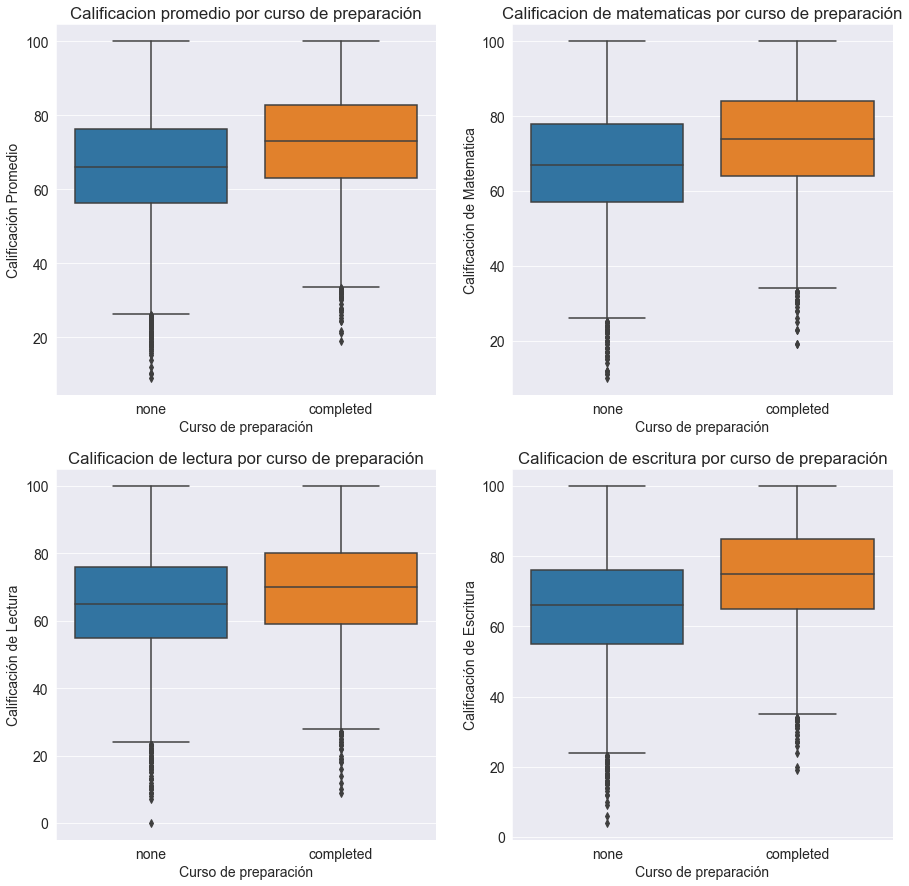

In [58]:
fig, axes = plt.subplots(2,2, figsize=(15, 15))

axes[0,0].set_title("Calificacion promedio por curso de preparación")
sns.boxplot(x="TestPrep", y="MeanScore", data=calificaciones_df, ax=axes[0,0])
axes[0,0].set_xlabel("Curso de preparación")
axes[0,0].set_ylabel("Calificación Promedio");

axes[1,0].set_title("Calificacion de lectura por curso de preparación")
sns.boxplot(x="TestPrep", y="MathScore", data=calificaciones_df, ax=axes[1,0])
axes[1,0].set_xlabel("Curso de preparación")
axes[1,0].set_ylabel("Calificación de Lectura");

axes[0,1].set_title("Calificacion de matematicas por curso de preparación")
sns.boxplot(x="TestPrep", y="ReadingScore", data=calificaciones_df, ax=axes[0,1])
axes[0,1].set_xlabel("Curso de preparación")
axes[0,1].set_ylabel("Calificación de Matematica");

axes[1,1].set_title("Calificacion de escritura por curso de preparación")
sns.boxplot(x="TestPrep", y="WritingScore", data=calificaciones_df, ax=axes[1,1])
axes[1,1].set_xlabel("Curso de preparación")
axes[1,1].set_ylabel("Calificación de Escritura");

Observando los graficos de cajas podemos deducir que el curso de preparación fue de gran ayuda para los alumnos.

En las tres areas calificadas, podemos ver que el valor minimo obtenido por los alumnos que tomarón el curso de preparación supero el valor minimo de los que no lo tomarón. Lo mismo sucede con la mediana y los cuartiles pero cabe resaltar que la diferencia ronda entre los 5 a 10 puntos.

#### Q4: ¿La regularidad con la que practican deporte los alumnos afectan positiva o negativamente sus calificaciones?

Al igual que la anterior pregunta, el grafico de cajas y bigotes sera de gran ayuda para responder esta pregunta.

Como inferencia personal, pienso que el practicar deporte afectara negativamente las calificaciones de los alumnos ya que tendren menos tiempo para estudiar para sus examenes.

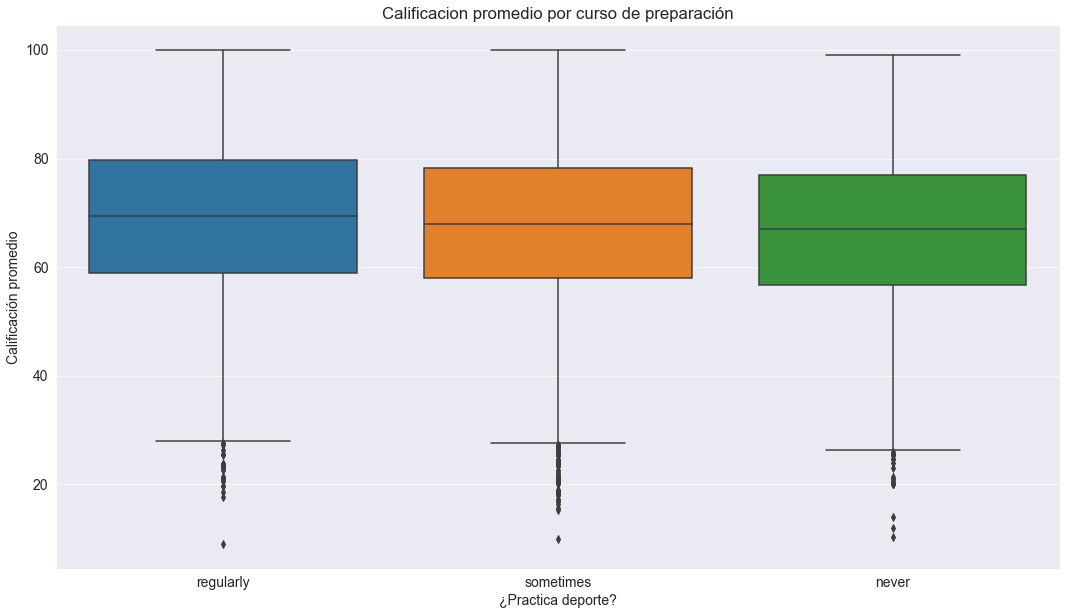

In [59]:
plt.title("Calificacion promedio por curso de preparación")
sns.boxplot(x="PracticeSport", y="MeanScore", data=calificaciones_df)
plt.xlabel("¿Practica deporte?")
plt.ylabel("Calificación promedio");

El grafico nos dice que la inferencia realizada inicialmente esta erronea, ya que el practicar deporte con regularidad no afecta negativamente en las calificaciones de los alumnos, mas bien genera que estos obtengan mejores calificaciones a comparación de aquellos alumnos que practican deporte a veces o nunca lo han hecho.

El valor minimo, los cuartiles y la mediana de los alumnos que practican deporte con regularidad superan a los que lo realizan a veces o nunca hen hecho deporte.

#### Q5: ¿Que grupo etnico de alumnos a estudiado es mas ocaciones mas de 10 horas?

Para responder esta pregunta, lo que vamos a realizar es una tabla de doble entrada donde las filas seran los grupos etnicos y las columnas los rangos de horas estudiadas.

In [60]:
calificaciones_df[["EthnicGroup","WklyStudyHours"]].pivot_table(index="EthnicGroup", columns="WklyStudyHours", aggfunc=len, fill_value=0)

WklyStudyHours,5 - 10,< 5,> 10
EthnicGroup,,,
Desconocido,1003,467,315
group A,1236,585,394
group B,3272,1586,958
group C,5170,2524,1505
group D,4148,2003,1336
group E,2298,1058,681


Podemos observar en la tabla, que el grupo etnico "grupo C" ha estudiado en mas ocaciones mas de 10 horas, siguiendoles el "grupo D", "grupo B", "grupo E" y el "grupo A"

## Referencias y trabajo futuro

**Las principales referencias de este proyecto fueron:**

- Kaggle: https://www.kaggle.com/
- Documentación Pandas: https://pandas.pydata.org/docs/
- Documentación Numpy: https://numpy.org/doc/
- Documentación Matplotlib: https://matplotlib.org/stable/index.html
- Documentación Seaborn: https://seaborn.pydata.org/

**Como futuro proyecto a trabajar se podria utilizar el siguiente conjunto de datos:**

- US Elections Dataset: https://www.kaggle.com/datasets/tunguz/us-elections-dataset